### **Tienda Aurelion**

# **Análisis de Rendimiento de Ventas (Demo IBM SkillsBuild) **

paso 1 exploracion inicial, limpieza y normalizacion


In [1]:
# =============================================================
# BLOQUE 1 - EXPLORACIÓN, LIMPIEZA Y NORMALIZACIÓN
# Proyecto: Tienda Aurelion (versión Colab)
# Archivos: ventas.csv, detalle_ventas.csv, productos.csv, clientes.csv
# =============================================================

# --- 1. CONEXIÓN CON GOOGLE DRIVE ---
from google.colab import drive
import os
import pandas as pd

from google.colab import drive
drive.mount('/content/drive', force_remount=True)





Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:



# Ruta base (ajustá tu carpeta raíz según sea necesario)
base_path = "/content/drive/MyDrive/demoibm/data_original"
output_path = "/content/drive/MyDrive/demoibm/data_limpia"

# Crear carpeta de salida si no existe
os.makedirs(output_path, exist_ok=True)

# --- 2. CARGA DE ARCHIVOS ---
ventas = pd.read_csv(f"{base_path}/ventas.csv")
detalle_ventas = pd.read_csv(f"{base_path}/detalle_ventas.csv")
productos = pd.read_csv(f"{base_path}/productos.csv")
clientes = pd.read_csv(f"{base_path}/clientes.csv")

# --- 3. EXPLORACIÓN INICIAL ---
print("=== DIMENSIONES ===")
print(f"Ventas: {ventas.shape}")
print(f"Detalle Ventas: {detalle_ventas.shape}")
print(f"Productos: {productos.shape}")
print(f"Clientes: {clientes.shape}\n")

print("=== VISTA RÁPIDA (HEAD) ===")
print("\nVentas:\n", ventas.head())
print("\nDetalle Ventas:\n", detalle_ventas.head())
print("\nProductos:\n", productos.head())
print("\nClientes:\n", clientes.head())

print("\n=== INFORMACIÓN DE TIPOS DE DATOS ===")
print("\nVentas:")
print(ventas.info())
print("\nDetalle Ventas:")
print(detalle_ventas.info())
print("\nProductos:")
print(productos.info())
print("\nClientes:")
print(clientes.info())

# --- 4. LIMPIEZA DE DUPLICADOS ---
print("\n=== ELIMINACIÓN DE DUPLICADOS ===")
ventas.drop_duplicates(inplace=True)
detalle_ventas.drop_duplicates(inplace=True)
productos.drop_duplicates(inplace=True)
clientes.drop_duplicates(inplace=True)

# --- 5. LIMPIEZA DE VALORES FALTANTES ---
print("\n=== VALORES FALTANTES ANTES ===")
print("Ventas:\n", ventas.isnull().sum())
print("Detalle Ventas:\n", detalle_ventas.isnull().sum())
print("Productos:\n", productos.isnull().sum())
print("Clientes:\n", clientes.isnull().sum())

# Reglas simples: si hay nulos en textos -> "Desconocido", en números -> 0
ventas.fillna({"medio_pago": "Desconocido"}, inplace=True)
detalle_ventas.fillna({"cantidad": 0, "importe": 0}, inplace=True)
productos.fillna({"categoria": "Desconocido", "precio_unitario": 0}, inplace=True)
clientes.fillna({"ciudad": "Desconocido", "email": "sin_email@aurelion.com"}, inplace=True)

# --- 6. NORMALIZACIÓN DE FORMATOS ---
print("\n=== NORMALIZANDO FORMATOS ===")

# Fechas al formato datetime
ventas["fecha"] = pd.to_datetime(ventas["fecha"], errors="coerce")

# Strings en minúsculas / mayúsculas normalizadas
ventas["medio_pago"] = ventas["medio_pago"].str.strip().str.lower()
productos["categoria"] = productos["categoria"].str.strip().str.title()
clientes["ciudad"] = clientes["ciudad"].str.strip().str.title()

# Nombres de clientes normalizados
if "nombre_cliente" in clientes.columns:
    clientes["nombre_cliente"] = clientes["nombre_cliente"].str.title()
if "nombre_cliente" in ventas.columns:
    ventas["nombre_cliente"] = ventas["nombre_cliente"].str.title()

# --- 7. VERIFICACIÓN FINAL ---
print("\n=== INFORMACIÓN FINAL DE LOS DATASETS ===")
for nombre, df in {
    "ventas": ventas,
    "detalle_ventas": detalle_ventas,
    "productos": productos,
    "clientes": clientes,
}.items():
    print(f"\nArchivo: {nombre}")
    print(df.info())
    print(df.head(3))
    print("-" * 50)

# --- 8. GUARDADO DE ARCHIVOS LIMPIOS ---
ventas.to_csv(f"{output_path}/ventas_limpio.csv", index=False)
detalle_ventas.to_csv(f"{output_path}/detalle_ventas_limpio.csv", index=False)
productos.to_csv(f"{output_path}/productos_limpio.csv", index=False)
clientes.to_csv(f"{output_path}/clientes_limpio.csv", index=False)

print("\n✅ Archivos limpios guardados correctamente en:", output_path)


=== DIMENSIONES ===
Ventas: (120, 6)
Detalle Ventas: (343, 6)
Productos: (100, 4)
Clientes: (100, 5)

=== VISTA RÁPIDA (HEAD) ===

Ventas:
    id_venta       fecha  id_cliente    nombre_cliente  \
0         1  2024-06-19          62  Guadalupe Romero   
1         2  2024-03-17          49      Olivia Gomez   
2         3  2024-01-13          20      Tomas Acosta   
3         4  2024-02-27          36    Martina Molina   
4         5  2024-06-11          56        Bruno Diaz   

                       email     medio_pago  
0  guadalupe.romero@mail.com        tarjeta  
1      olivia.gomez@mail.com             qr  
2      tomas.acosta@mail.com        tarjeta  
3    martina.molina@mail.com  transferencia  
4        bruno.diaz@mail.com        tarjeta  

Detalle Ventas:
    id_venta  id_producto        nombre_producto  cantidad  precio_unitario  \
0         1           90    Toallas Húmedas x50         1             2902   
1         2           82  Aceitunas Negras 200g         5          

**union**

In [4]:
# =============================================================
# BLOQUE 2 - UNIÓN DE DATASETS Y CREACIÓN DEL DATAFRAME MAESTRO
# Proyecto: Tienda Aurelion
# Archivos limpios: ventas_limpio.csv, detalle_ventas_limpio.csv,
# productos_limpio.csv, clientes_limpio.csv
# =============================================================

import pandas as pd
import os

# --- 1. RUTAS ---
base_path = "/content/drive/MyDrive/demoibm/data_limpia"
output_path = "/content/drive/MyDrive/demoibm/data_final"

os.makedirs(output_path, exist_ok=True)

# --- 2. CARGA DE ARCHIVOS LIMPIOS ---
ventas = pd.read_csv(f"{base_path}/ventas_limpio.csv")
detalle = pd.read_csv(f"{base_path}/detalle_ventas_limpio.csv")
productos = pd.read_csv(f"{base_path}/productos_limpio.csv")
clientes = pd.read_csv(f"{base_path}/clientes_limpio.csv")

print("Archivos cargados correctamente ✅\n")

# --- 3. UNIÓN ENTRE TABLAS ---
# Paso 1: unir ventas + detalle_ventas por id_venta
ventas_detalle = pd.merge(detalle, ventas, on="id_venta", how="left")

# Paso 2: unir con productos por id_producto
ventas_productos = pd.merge(ventas_detalle, productos, on="id_producto", how="left")

# Paso 3: unir con clientes por id_cliente
ventas_completas = pd.merge(
    ventas_productos, clientes, on="id_cliente", how="left", suffixes=('_venta', '_cliente')
)

# --- 4. VALIDACIÓN DE CLAVES Y DUPLICADOS ---
print("Filas totales luego de la unión:", len(ventas_completas))
duplicados = ventas_completas.duplicated().sum()
print(f"Duplicados encontrados: {duplicados}")
if duplicados > 0:
    ventas_completas.drop_duplicates(inplace=True)
    print("Duplicados eliminados.")

# --- 5. CREACIÓN DE COLUMNAS DERIVADAS ---
# Calcular importe total por venta (si no existiera)
if 'importe' not in ventas_completas.columns:
    ventas_completas['importe'] = ventas_completas['cantidad'] * ventas_completas['precio_unitario']

# Crear una columna de mes (para análisis temporal)
ventas_completas["mes"] = pd.to_datetime(ventas_completas["fecha"]).dt.month


#Limpieza de columnas repetidas

# --- Limpieza y renombrado de columnas ---
ventas_completas = ventas_completas.rename(columns={
    'nombre_producto_x': 'nombre_producto',
    'precio_unitario_x': 'precio_unitario',
    'nombre_cliente_venta': 'nombre_cliente',
    'email_venta': 'email'
})

# Eliminar posibles columnas con sufijos no deseados (_y)
ventas_completas = ventas_completas.loc[:, ~ventas_completas.columns.str.endswith(('_x', '_y'))]

print("\nColumnas finales limpias:")
print(ventas_completas.columns.tolist())


ventas_completas.columns
#


# --- 6. GUARDAR EL DATASET FINAL ---
ventas_completas.to_csv(f"{output_path}/ventas_completas.csv", index=False)

print("\n✅ Dataset maestro guardado en:", f"{output_path}/ventas_completas.csv")
print(f"Dimensiones finales: {ventas_completas.shape}")


Archivos cargados correctamente ✅

Filas totales luego de la unión: 343
Duplicados encontrados: 0

Columnas finales limpias:
['id_venta', 'id_producto', 'nombre_producto', 'cantidad', 'precio_unitario', 'importe', 'fecha', 'id_cliente', 'nombre_cliente', 'email', 'medio_pago', 'categoria', 'nombre_cliente_cliente', 'email_cliente', 'ciudad', 'fecha_alta', 'mes']

✅ Dataset maestro guardado en: /content/drive/MyDrive/demoibm/data_final/ventas_completas.csv
Dimensiones finales: (343, 17)


In [ ]:

ventas_completas.head()
print("\nColumnas actuales del DataFrame:")
print(ventas_completas.columns.tolist())



Columnas actuales del DataFrame:
['id_venta', 'id_producto', 'nombre_producto', 'cantidad', 'precio_unitario', 'importe', 'fecha', 'id_cliente', 'nombre_cliente', 'email', 'medio_pago', 'categoria', 'nombre_cliente_cliente', 'email_cliente', 'ciudad', 'fecha_alta', 'mes']


# **Estadisticas**


✅ Dataset maestro cargado correctamente.

Dimensiones: (343, 17)
Variables numéricas: ['id_venta', 'id_producto', 'cantidad', 'precio_unitario', 'importe', 'id_cliente', 'mes']
Variables categóricas: ['nombre_producto', 'fecha', 'nombre_cliente', 'email', 'medio_pago', 'categoria', 'nombre_cliente_cliente', 'email_cliente', 'ciudad', 'fecha_alta']

=== ESTADÍSTICAS DESCRIPTIVAS ===
         id_venta  id_producto    cantidad  precio_unitario       importe  \
count  343.000000   343.000000  343.000000       343.000000    343.000000   
mean    61.492711    49.139942    2.962099      2654.495627   7730.078717   
std     34.835525    29.135461    1.366375      1308.694720   5265.543077   
min      1.000000     1.000000    1.000000       272.000000    272.000000   
25%     31.000000    23.000000    2.000000      1618.500000   3489.000000   
50%     61.000000    47.000000    3.000000      2512.000000   6702.000000   
75%     93.000000    76.000000    4.000000      3876.000000  10231.500000   

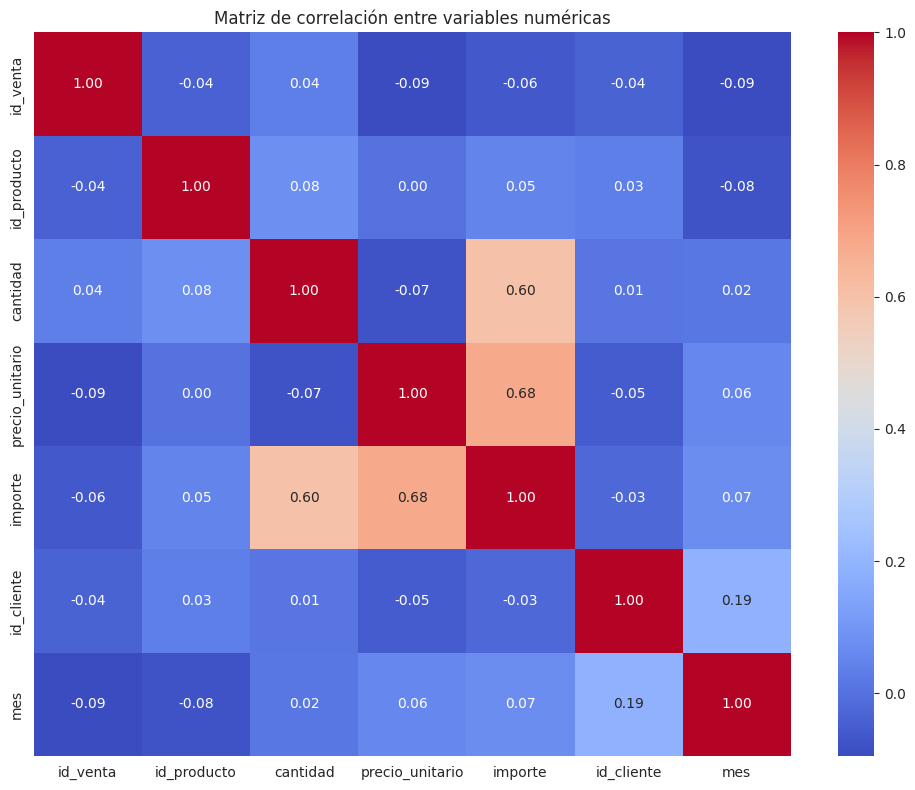


=== CORRELACIONES ENTRE VARIABLES CATEGÓRICAS (Cramér’s V) ===
nombre_producto ↔ categoria: 0.85
fecha ↔ nombre_cliente: 0.80
fecha ↔ email: 0.80
fecha ↔ medio_pago: 0.72
fecha ↔ nombre_cliente_cliente: 0.80
fecha ↔ email_cliente: 0.80
fecha ↔ ciudad: 0.73
fecha ↔ fecha_alta: 0.80
nombre_cliente ↔ email: 0.99
nombre_cliente ↔ medio_pago: 0.67
nombre_cliente ↔ nombre_cliente_cliente: 1.00
nombre_cliente ↔ email_cliente: 0.99
nombre_cliente ↔ ciudad: 0.89
nombre_cliente ↔ fecha_alta: 0.99
email ↔ medio_pago: 0.69
email ↔ nombre_cliente_cliente: 0.99
email ↔ email_cliente: 1.00
email ↔ ciudad: 0.90
email ↔ fecha_alta: 1.00
medio_pago ↔ nombre_cliente_cliente: 0.67
medio_pago ↔ email_cliente: 0.69
medio_pago ↔ ciudad: 0.30
medio_pago ↔ fecha_alta: 0.69
nombre_cliente_cliente ↔ email_cliente: 0.99
nombre_cliente_cliente ↔ ciudad: 0.89
nombre_cliente_cliente ↔ fecha_alta: 0.99
email_cliente ↔ ciudad: 0.90
email_cliente ↔ fecha_alta: 1.00
ciudad ↔ fecha_alta: 0.90

=== RESUMEN VISUAL GLOBAL 

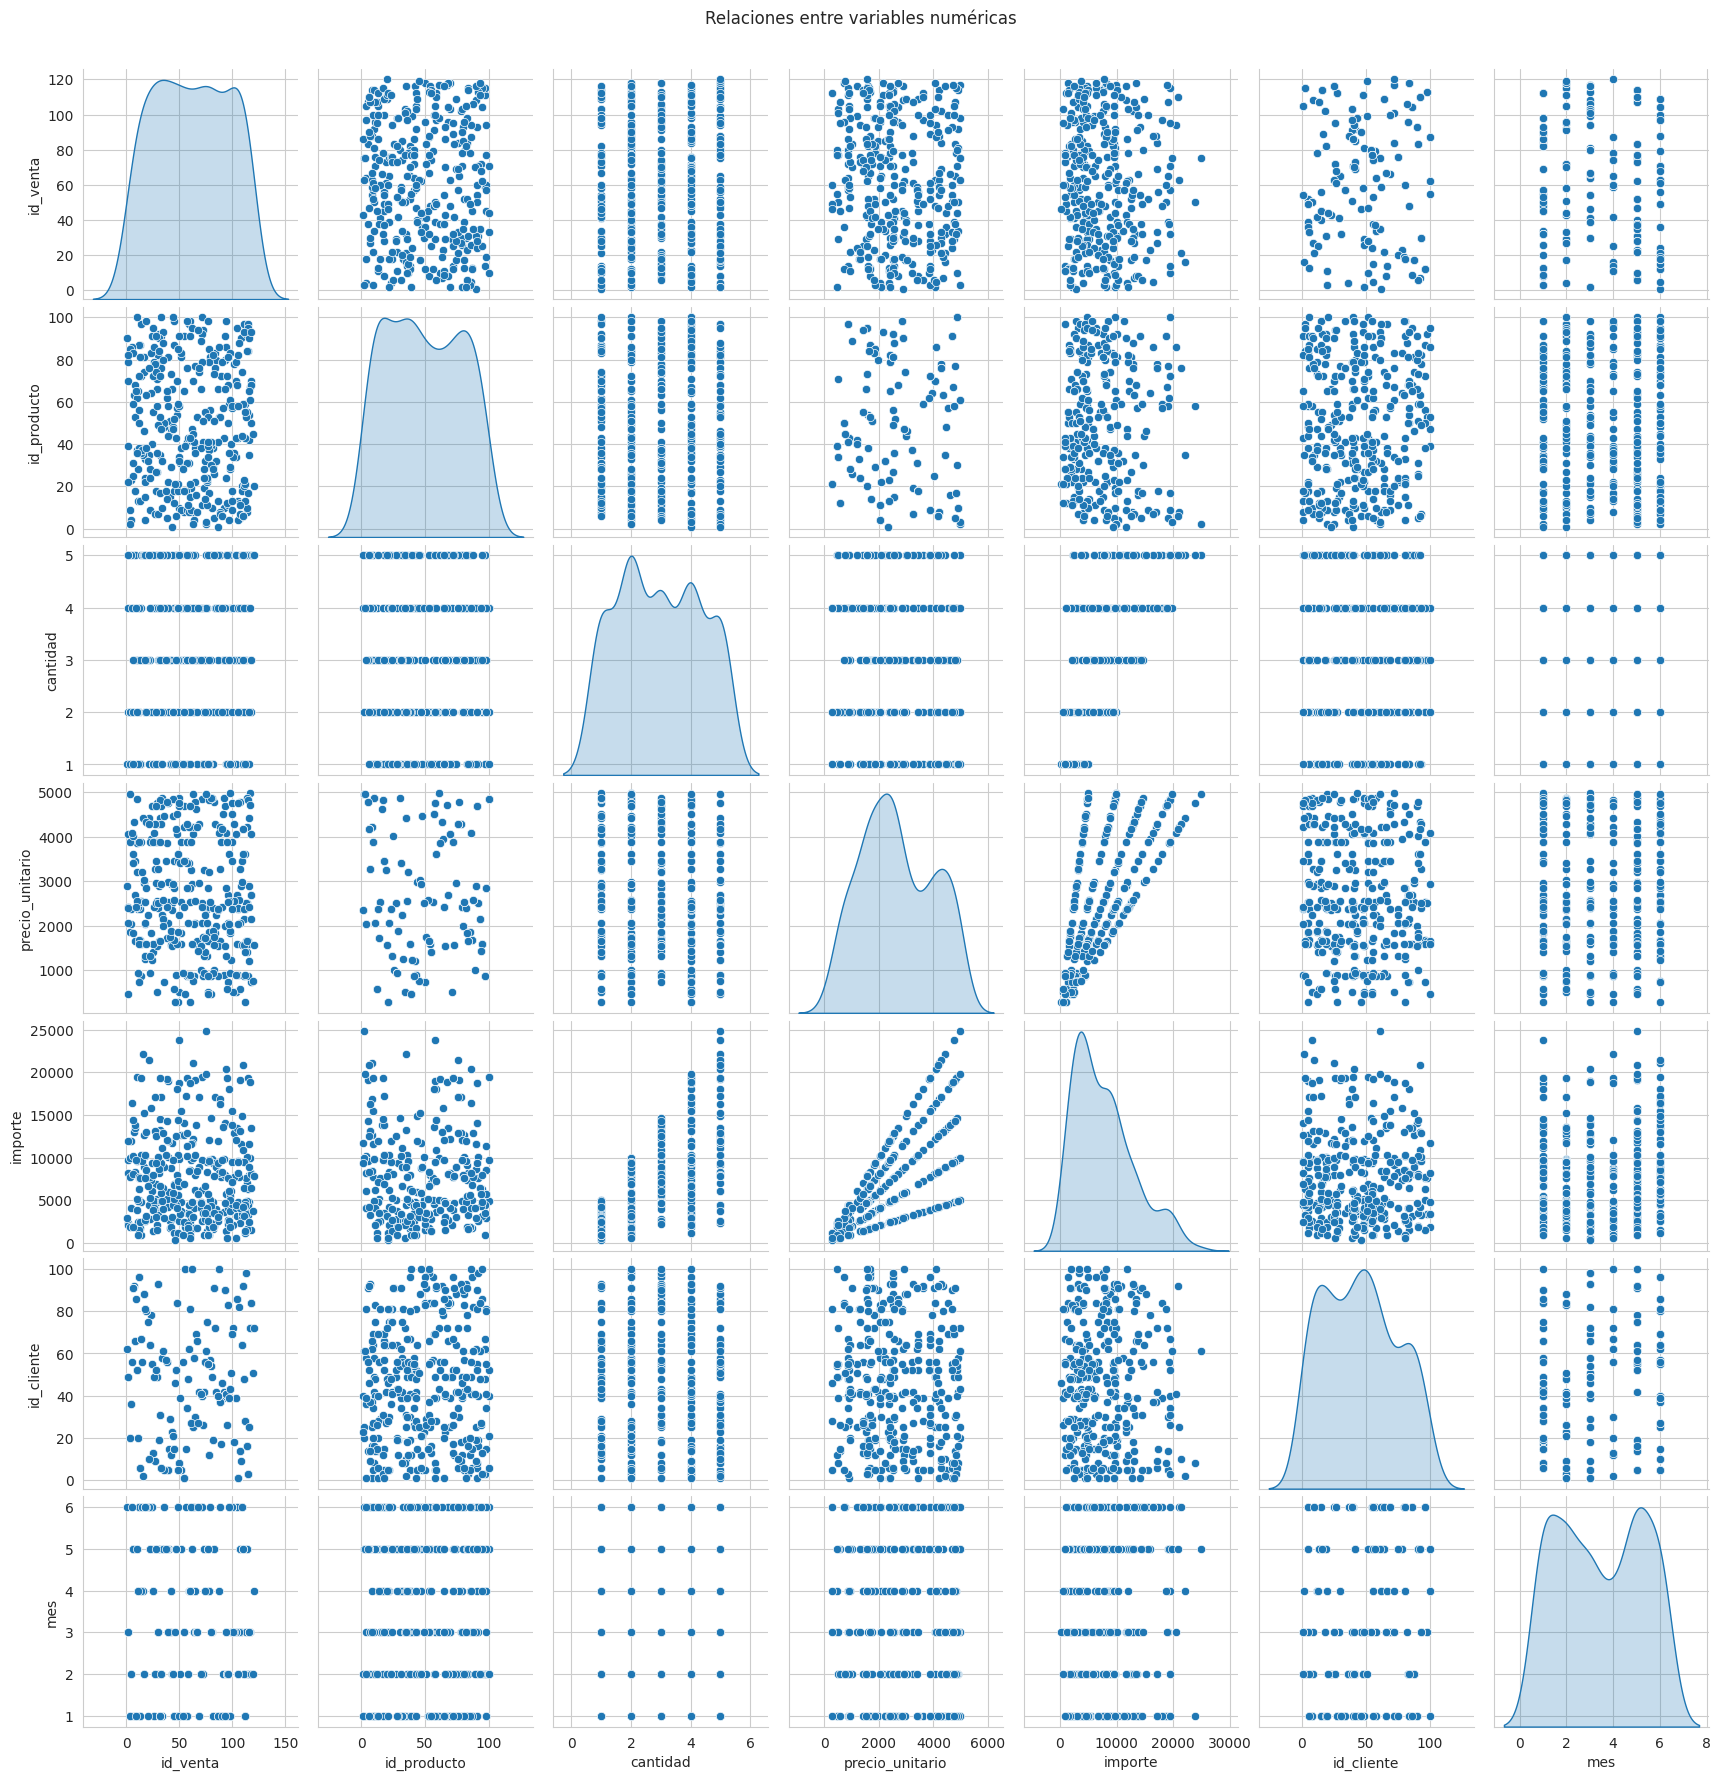


✅ Análisis exploratorio completado.
📂 Gráficos guardados en: /content/drive/MyDrive/demoibm/analisis_eda

📊 Columna: importe — 7 outliers encontrados


,importe,id_venta,id_cliente,categoria,medio_pago,ciudad
41,22150,16,2,Alimentos,efectivo,Carlos Paz
54,21430,21,10,Limpieza,transferencia,Cordoba
141,23760,50,8,Limpieza,transferencia,Carlos Paz
175,21090,63,25,Limpieza,tarjeta,Rio Cuarto
208,24865,75,61,Limpieza,qr,Rio Cuarto
260,20450,94,41,Limpieza,qr,Alta Gracia
308,20850,110,92,Limpieza,efectivo,Alta Gracia


In [ ]:
# =============================================================
# BLOQUE 3 - ANÁLISIS EXPLORATORIO (EDA)
# Proyecto: Tienda Aurelion
# =============================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats import chi2_contingency

# --- 1. CARGA DEL DATASET MAESTRO ---
df = pd.read_csv("/content/drive/MyDrive/demoibm/data_final/ventas_completas.csv")
print("✅ Dataset maestro cargado correctamente.\n")
print("Dimensiones:", df.shape)

# Crear carpeta para gráficos
eda_path = "/content/drive/MyDrive/demoibm/analisis_eda"
os.makedirs(eda_path, exist_ok=True)

# --- 2. IDENTIFICACIÓN DE TIPOS DE VARIABLES ---
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Variables numéricas:", num_cols)
print("Variables categóricas:", cat_cols)

# --- 3. ESTADÍSTICAS DESCRIPTIVAS ---
print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(df[num_cols].describe())

# --- 4. ANÁLISIS DE VALORES FALTANTES ---
print("\n=== ANÁLISIS DE VALORES FALTANTES ===")
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
if len(missing) > 0:
    print(missing)
    plt.figure(figsize=(8,4))
    sns.barplot(x=missing.values, y=missing.index)
    plt.title("Cantidad de valores faltantes por columna")
    plt.xlabel("Cantidad")
    plt.ylabel("Columna")
    plt.tight_layout()
    plt.savefig(f"{eda_path}/valores_faltantes.png")
    plt.show()
else:
    print("✅ No hay valores faltantes en el dataset.")

# --- 5. DISTRIBUCIÓN DE VARIABLES NUMÉRICAS ---
print("\n=== DISTRIBUCIÓN DE VARIABLES NUMÉRICAS ===")
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribución de {col}")
    plt.tight_layout()
    plt.savefig(f"{eda_path}/dist_{col}.png")
    plt.close()

# --- 6. ASIMETRÍA (SKEWNESS) ---
print("\n=== ASIMETRÍA DE VARIABLES NUMÉRICAS ===")
for col in num_cols:
    skew = df[col].skew()
    print(f"{col}: {skew:.2f}")

# --- 7. DETECCIÓN DE OUTLIERS (CUARTILES E IQR) ---
print("\n=== DETECCIÓN DE OUTLIERS ===")
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    print(f"{col}: {outliers} outliers detectados")

# --- 8. ANÁLISIS DE CARDINALIDAD DE VARIABLES CATEGÓRICAS ---
print("\n=== CARDINALIDAD DE VARIABLES CATEGÓRICAS ===")
for col in cat_cols:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} valores únicos")

# --- 9. CORRELACIONES ENTRE VARIABLES NUMÉRICAS ---
print("\n=== MATRIZ DE CORRELACIÓN (NUMÉRICAS) ===")
corr = df[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación entre variables numéricas")
plt.tight_layout()
plt.savefig(f"{eda_path}/matriz_correlacion.png")
plt.show()

# --- 10. CORRELACIONES ENTRE VARIABLES CATEGÓRICAS (Cramér’s V) ---
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

print("\n=== CORRELACIONES ENTRE VARIABLES CATEGÓRICAS (Cramér’s V) ===")
cat_pairs = [(a,b) for i,a in enumerate(cat_cols) for b in cat_cols[i+1:]]
for a,b in cat_pairs:
    v = cramers_v(df[a], df[b])
    if v > 0.3:
        print(f"{a} ↔ {b}: {v:.2f}")

# --- 11. RESUMEN VISUAL GLOBAL ---
print("\n=== RESUMEN VISUAL GLOBAL ===")
sample_size = min(500, len(df))
sns.pairplot(df[num_cols].sample(sample_size, random_state=42), diag_kind="kde")
plt.suptitle("Relaciones entre variables numéricas", y=1.02)
plt.savefig(f"{eda_path}/resumen_visual.png")
plt.show()

print("\n✅ Análisis exploratorio completado.")
print(f"📂 Gráficos guardados en: {eda_path}")


# =============================================================
# BLOQUE EXTRA - VISUALIZAR OUTLIERS DETECTADOS
# =============================================================


# --- 1. Definir función para obtener outliers ---
def obtener_outliers(df, columna):
    """Devuelve las filas que son outliers según el rango intercuartílico (IQR)."""
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    return outliers

# --- 2. Aplicar a las columnas numéricas ---
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in num_cols:
    outliers_col = obtener_outliers(df, col)
    cantidad = len(outliers_col)
    if cantidad > 0:
        print(f"\n📊 Columna: {col} — {cantidad} outliers encontrados")
        display(outliers_col[[col]].join(df[['id_venta', 'id_cliente', 'categoria', 'medio_pago', 'ciudad']], how='left').head(10))


In [5]:
# =============================================================
# BLOQUE 3 - VISUALIZACIÓN DE PRODUCTOS ÚNICOS POR CATEGORÍA
# Dataset: ventas_completas.csv
# Objetivo: mostrar los valores únicos reales de "nombre_producto"
# dentro de cada categoría (Alimentos, Limpieza, etc.)
# =============================================================

import pandas as pd

# --- 1️⃣ CARGA DEL DATASET ---
df = pd.read_csv("/content/drive/MyDrive/demoibm/data_final/ventas_completas.csv")

# --- 2️⃣ NORMALIZACIÓN DE TEXTO ---
df['categoria'] = df['categoria'].astype(str).str.strip().str.lower()
df['nombre_producto'] = df['nombre_producto'].astype(str).str.strip().str.lower()

# --- 3️⃣ MOSTRAR CATEGORÍAS DISPONIBLES ---
categorias = df['categoria'].unique()
print(f"Categorías encontradas: {categorias}\n")

# --- 4️⃣ LISTAR PRODUCTOS ÚNICOS POR CATEGORÍA ---
productos_por_categoria = (
    df.groupby('categoria')['nombre_producto']
    .unique()
    .apply(sorted)
    .reset_index()
)

# --- 5️⃣ IMPRIMIR RESULTADO DETALLADO ---
for _, row in productos_por_categoria.iterrows():
    print(f"\n🗂️ Categoría: {row['categoria'].capitalize()}")
    print("------------------------------------------------")
    for prod in row['nombre_producto']:
        print(f" - {prod}")


Categorías encontradas: ['limpieza' 'alimentos']


🗂️ Categoría: Alimentos
------------------------------------------------
 - aceite de girasol 1l
 - aceitunas verdes 200g
 - agua mineral 500ml
 - alfajor simple
 - barrita de cereal 30g
 - bizcochos salados
 - café molido 250g
 - caldo concentrado verdura
 - cepillo de dientes
 - cerveza rubia 1l
 - chicle menta
 - chocolate con leche 100g
 - coca cola 1.5l
 - desodorante aerosol
 - empanadas congeladas
 - fideos spaghetti 500g
 - galletitas vainilla
 - garbanzos 500g
 - gin 700ml
 - granola 250g
 - hamburguesas congeladas x4
 - harina de trigo 1kg
 - helado vainilla 1l
 - jugo de manzana 1l
 - jugo en polvo naranja
 - lavandina 1l
 - leche descremada 1l
 - limpiavidrios 500ml
 - manteca 200g
 - mascarilla capilar
 - mermelada de durazno 400g
 - miel pura 250g
 - mix de frutos secos 200g
 - pan lactal integral
 - papas fritas onduladas 100g
 - queso cremoso 500g
 - queso untable 190g
 - sal fina 500g
 - salsa de tomate 500g
 - servill

In [6]:
import pandas as pd

# --- 1️⃣ CARGAR EL DATASET ORIGINAL ---
df_original = pd.read_csv("/content/drive/MyDrive/demoibm/data_final/ventas_completas.csv")

# Crear una copia para trabajar
df = df_original.copy()

# Normalizar nombres de productos (minúsculas, sin espacios extra)
df['nombre_producto'] = df['nombre_producto'].str.lower().str.strip()

alimentos = [
    'aceite de girasol 1l',
    'aceitunas verdes 200g',
    'aceitunas negras 200g',
    'agua mineral 500ml',
    'alfajor simple',
    'alfajor triple',
    'arroz largo fino 1kg',
    'avena instantánea 250g',
    'azúcar 1kg',
    'barrita de cereal 30g',
    'bizcochos salados',
    'café molido 250g',
    'caldo concentrado verdura',
    'caldo concentrado carne',
    'caramelos masticables',
    'cerveza rubia 1l',
    'cerveza negra 1l',
    'chicle menta',
    'chocolate con leche 100g',
    'chocolate amargo 100g',
    'coca cola 1.5l',
    'dulce de leche 400g',
    'energética nitro 500ml',
    'empanadas congeladas',
    'fanta naranja 1.5l',
    'fernet 750ml',
    'fideos spaghetti 500g',
    'galletitas vainilla',
    'galletitas chocolate',
    'garbanzos 500g',
    'gin 700ml',
    'granola 250g',
    'hamburguesas congeladas x4',
    'harina de trigo 1kg',
    'helado vainilla 1l',
    'helado chocolate 1l',
    'helado de frutilla 1l',
    'jugo de manzana 1l',
    'jugo de naranja 1l',
    'jugo en polvo naranja',
    'jugo en polvo limón',
    'leche descremada 1l',
    'leche entera 1l',
    'lentejas secas 500g',
    'manteca 200g',
    'maní salado 200g',
    'medialunas de manteca',
    'mermelada de durazno 400g',
    'mermelada de frutilla 400g',
    'miel pura 250g',
    'mix de frutos secos 200g',
    'pan lactal integral',
    'pan lactal blanco',
    'papas fritas onduladas 100g',
    'papas fritas clásicas 100g',
    'pepsi 1.5l',
    'pizza congelada muzzarella',
    'porotos negros 500g',
    'queso cremoso 500g',
    'queso untable 190g',
    'queso azul 150g',
    'queso rallado 150g',
    'ron 700ml',
    'sal fina 500g',
    'salsa de tomate 500g',
    'sopa instantánea pollo',
    'sprite 1.5l',
    'stevia 100 sobres',
    'té verde 20 saquitos',
    'té negro 20 saquitos',
    'turrón 50g',
    'verduras congeladas mix',
    'vinagre de alcohol 500ml',
    'vino tinto malbec 750ml',
    'vino blanco 750ml',
    'vodka 700ml',
    'whisky 750ml',
    'yerba mate suave 1kg',
    'yerba mate intensa 1kg',
    'yogur natural 200g'
]


limpieza = [
    'lavandina 1l',
    'limpiavidrios 500ml',
    'detergente líquido 750ml',
    'desengrasante 500ml',
    'papel higiénico x4',
    'toallas húmedas x50',
    'trapo de piso',
    'cepillo de dientes',
    'crema dental 90g',
    'hilo dental',
    'jabón de tocador',
    'shampoo 400ml',
    'mascarilla capilar',
    'desodorante aerosol',
    'servilletas x100'
]


# --- 3️⃣ FUNCIÓN EXACTA DE CLASIFICACIÓN ---
def clasificar_producto(nombre):
    if nombre in alimentos:
        return 'alimentos'
    elif nombre in limpieza:
        return 'limpieza'
    else:
        return 'otros'

# --- 4️⃣ APLICAR CLASIFICACIÓN A LA COPIA ---
df['categoria'] = df['nombre_producto'].apply(clasificar_producto)

# --- 5️⃣ EXPORTAR EL NUEVO ARCHIVO ---
ruta_salida = "/content/drive/MyDrive/demoibm/data_final/productos_categorias_normalizadas.csv"
df.to_csv(ruta_salida, index=False, encoding='utf-8-sig')

print(f"✅ Copia creada y categorías reclasificadas correctamente.\n📁 Archivo guardado en:\n{ruta_salida}")



✅ Copia creada y categorías reclasificadas correctamente.
📁 Archivo guardado en:
/content/drive/MyDrive/demoibm/data_final/productos_categorias_normalizadas.csv


# **Visualizaciones**

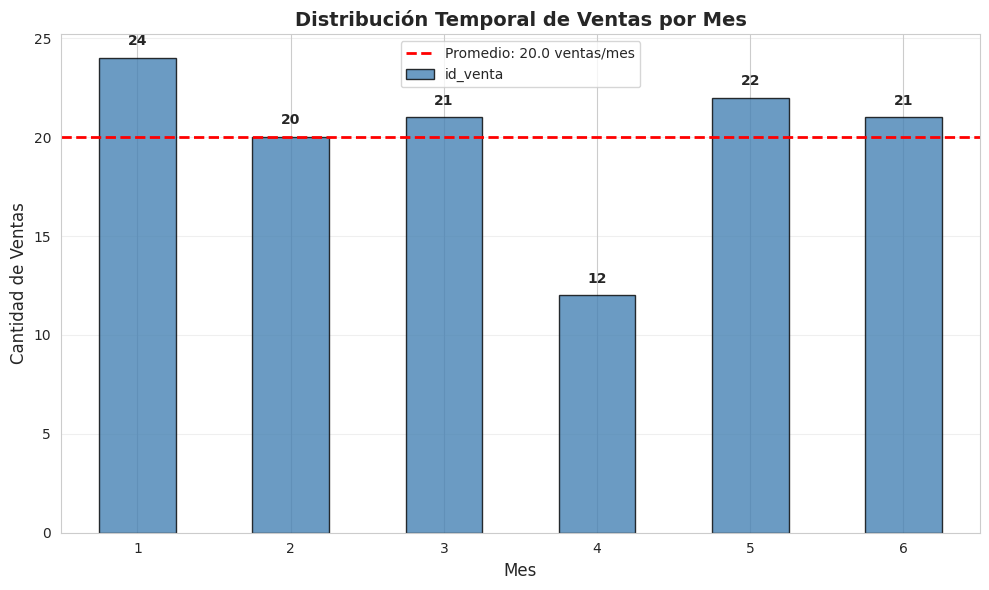

ANÁLISIS DE DISTRIBUCIÓN TEMPORAL: VENTAS POR MES

Total de ventas únicas: 120
Promedio mensual: 20.00 ventas
Desviación Estándar: 4.15
La mayoría de los meses tienen ventas que están entre 16 y 24 ventas
El tipo de distribución de datos del grafico es Multimodal

Coeficiente de variación:
20.74%
Esto indica una variabilidad MODERADA: si bien las ventas no son idénticas cada mes, tampoco hay fluctuaciones extremas.


In [ ]:
# =============================================================
# LIBRERÍAS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd

# =============================================================
# --- 1️⃣ CARGA DEL DATASET ---
df = pd.read_csv("/content/drive/MyDrive/demoibm/data_final/productos_categorias_normalizadas.csv")

# Configurar el estilo
sns.set_style("whitegrid")

# Calcular ventas ÚNICAS por mes
ventas_por_mes = df.groupby('mes')['id_venta'].nunique()

# Crear figura
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras
ventas_por_mes.plot(kind='bar', ax=ax, color='steelblue', alpha=0.8, edgecolor='black')
ax.set_title('Distribución Temporal de Ventas por Mes', fontsize=14, fontweight='bold')
ax.set_xlabel('Mes', fontsize=12)
ax.set_ylabel('Cantidad de Ventas', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Agregar etiquetas en las barras
for i, v in enumerate(ventas_por_mes):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Línea horizontal con el promedio
promedio = ventas_por_mes.mean()
ax.axhline(promedio, color='red', linestyle='--', linewidth=2, label=f'Promedio: {promedio:.1f} ventas/mes')
ax.legend(fontsize=10)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis estadístico
print("=" * 60)
print("ANÁLISIS DE DISTRIBUCIÓN TEMPORAL: VENTAS POR MES")
print("=" * 60)
print(f"\nTotal de ventas únicas: {ventas_por_mes.sum()}")
print(f"Promedio mensual: {ventas_por_mes.mean():.2f} ventas")
print(f"Desviación Estándar: {ventas_por_mes.std():.2f}")
print("La mayoría de los meses tienen ventas que están entre 16 y 24 ventas")
print("El tipo de distribución de datos del grafico es Multimodal")

print("\nCoeficiente de variación:")
cv = ventas_por_mes.std() / ventas_por_mes.mean() * 100
print(f"{cv:.2f}%")
print("Esto indica una variabilidad MODERADA: si bien las ventas no son idénticas cada mes, tampoco hay fluctuaciones extremas.")



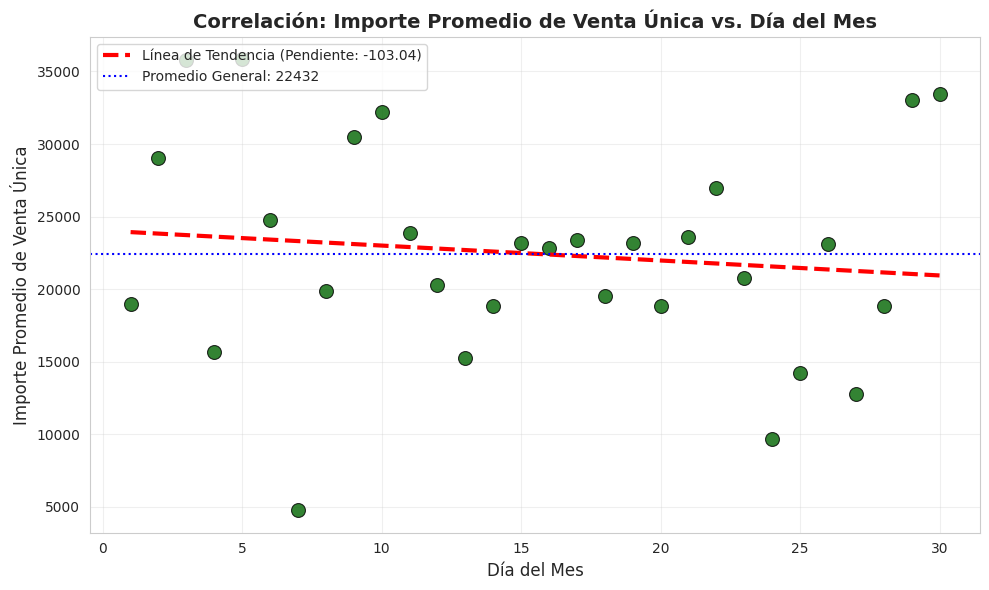

ANÁLISIS DE CORRELACIÓN: DÍA DEL MES vs. IMPORTE PROMEDIO DE VENTA ÚNICA

Coeficiente de Correlación de Pearson (r): -0.1208
Pendiente de la Línea de Regresión: -103.04

Fuerza de la Correlación: DÉBIL
Dirección de la Correlación: NEGATIVA (el importe promedio baja a medida que avanza el mes).

Interpretación:
* **Correlación:** La correlación es **débil y negativa** (r=-0.1208).
* **Efecto Día de Pago:** **Sí, la gente gasta más a principios de mes** ya que el día **5.0** tiene el importe promedio más alto ($35835), el cual es un día temprano en el mes.
* **Valles:** El día **7.0** registra el importe promedio más bajo ($4756), generalmente un día posterior.
* **Conclusión:** Aunque la correlación lineal es débil, el **pico de gasto** (importe promedio más alto) se encuentra a **principios de mes**, lo cual respalda parcialmente la hipótesis del efecto 'día de pago'.


In [ ]:
# =================================================================
# 1. PREPARACIÓN DE DATOS PARA LA CORRELACIÓN (Ventas Únicas)
# =================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- CARGA DEL DATASET CORRECTO ---
df = pd.read_csv("/content/drive/MyDrive/demoibm/data_final/productos_categorias_normalizadas.csv")

# Convertir la columna de fecha y extraer el día del mes
df['fecha'] = pd.to_datetime(df['fecha'])
df['dia_del_mes'] = df['fecha'].dt.day

# 1. Calcular el importe total por cada venta ÚNICA (SUMA de todas las líneas de la misma id_venta)
importe_por_venta_unica = df.groupby(['id_venta', 'dia_del_mes'])['importe'].sum().reset_index()

# 2. Calcular el IMPORTE PROMEDIO por DÍA del mes
importe_promedio_dia = importe_por_venta_unica.groupby('dia_del_mes')['importe'].mean().reset_index(name='importe_promedio')

# =================================================================
# 2. GRÁFICO DE DISPERSIÓN Y ANÁLISIS
# =================================================================

sns.set_style("whitegrid")

# Renombrar columnas para el gráfico
data_plot = importe_promedio_dia.rename(columns={'dia_del_mes': 'Día del Mes', 'importe_promedio': 'Importe Promedio de Venta'})

# Calcular la correlación de Pearson
correlacion = data_plot['Día del Mes'].corr(data_plot['Importe Promedio de Venta'])

# Crear figura
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de dispersión
sns.scatterplot(
    x='Día del Mes',
    y='Importe Promedio de Venta',
    data=data_plot,
    ax=ax,
    color='darkgreen',
    alpha=0.8,
    edgecolor='black',
    s=100
)

# Añadir línea de regresión lineal
z = np.polyfit(data_plot['Día del Mes'], data_plot['Importe Promedio de Venta'], 1)
p = np.poly1d(z)
ax.plot(data_plot['Día del Mes'], p(data_plot['Día del Mes']),
        color='red', linestyle='--', linewidth=3,
        label=f'Línea de Tendencia (Pendiente: {z[0]:.2f})')

# Línea horizontal con el promedio
promedio_general = importe_promedio_dia['importe_promedio'].mean()
ax.axhline(promedio_general, color='blue', linestyle=':', linewidth=1.5, label=f'Promedio General: {promedio_general:.0f}')
ax.legend(fontsize=10, loc='upper left')

ax.set_title('Correlación: Importe Promedio de Venta Única vs. Día del Mes', fontsize=14, fontweight='bold')
ax.set_xlabel('Día del Mes', fontsize=12)
ax.set_ylabel('Importe Promedio de Venta Única', fontsize=12)
ax.ticklabel_format(style='plain', axis='y')
ax.grid(axis='both', alpha=0.3)

plt.tight_layout()
plt.show()

# =================================================================
# 3. ANÁLISIS ESTADÍSTICO
# =================================================================

max_importe_dia = data_plot.loc[data_plot['Importe Promedio de Venta'].idxmax()]
min_importe_dia = data_plot.loc[data_plot['Importe Promedio de Venta'].idxmin()]

print("=" * 60)
print("ANÁLISIS DE CORRELACIÓN: DÍA DEL MES vs. IMPORTE PROMEDIO DE VENTA ÚNICA")
print("=" * 60)
print(f"\nCoeficiente de Correlación de Pearson (r): {correlacion:.4f}")
print(f"Pendiente de la Línea de Regresión: {z[0]:.2f}")

if abs(correlacion) < 0.1:
    fuerza = "MUY DÉBIL O INEXISTENTE"
elif abs(correlacion) < 0.3:
    fuerza = "DÉBIL"
elif abs(correlacion) < 0.5:
    fuerza = "MODERADA"
else:
    fuerza = "FUERTE"

if correlacion < 0:
    direccion = "NEGATIVA (el importe promedio baja a medida que avanza el mes)."
    evaluacion = "**Sí, la gente gasta más a principios de mes**"
else:
    direccion = "POSITIVA (el importe promedio sube a medida que avanza el mes)."
    evaluacion = "**No se confirma un patrón de mayor gasto a principios de mes**"

print(f"\nFuerza de la Correlación: {fuerza}")
print(f"Dirección de la Correlación: {direccion}")

print("\nInterpretación:")
print(f"* **Correlación:** La correlación es **{fuerza.lower()} y {'negativa' if correlacion < 0 else 'positiva'}** (r={correlacion:.4f}).")
print(f"* **Efecto Día de Pago:** {evaluacion} ya que el día **{max_importe_dia['Día del Mes']}** tiene el importe promedio más alto (${max_importe_dia['Importe Promedio de Venta']:.0f}), el cual es un día temprano en el mes.")
print(f"* **Valles:** El día **{min_importe_dia['Día del Mes']}** registra el importe promedio más bajo (${min_importe_dia['Importe Promedio de Venta']:.0f}), generalmente un día posterior.")
print("* **Conclusión:** Aunque la correlación lineal es débil, el **pico de gasto** (importe promedio más alto) se encuentra a **principios de mes**, lo cual respalda parcialmente la hipótesis del efecto 'día de pago'.")


# Análisis de los medios de pago

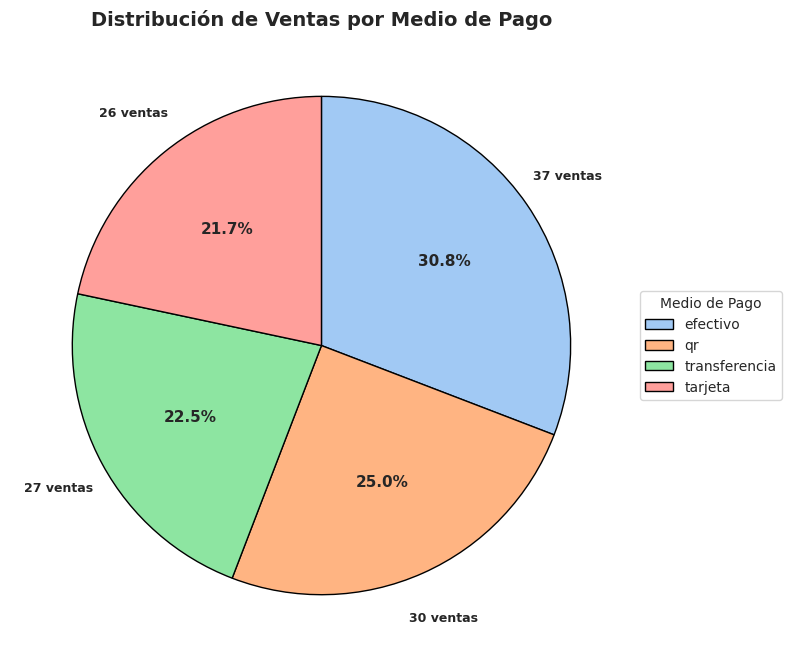

In [ ]:
# --- LIBRERÍAS ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- CARGA DEL DATASET ---
df = pd.read_csv("/content/drive/MyDrive/demoibm/data_final/productos_categorias_normalizadas.csv")

# --- AGRUPAR POR MEDIO DE PAGO ---
# Asegúrate de que las columnas 'medio_pago' e 'id_venta' existen en el dataset
ventas_por_medio = df.groupby('medio_pago')['id_venta'].nunique().sort_values(ascending=False)

# --- CALCULAR PORCENTAJES ---
porcentajes = ventas_por_medio / ventas_por_medio.sum() * 100

# --- COLORES ---
colors = sns.color_palette("pastel", len(ventas_por_medio))

# --- GRÁFICO DE TORTA ---
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    ventas_por_medio,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    counterclock=False,
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 11, 'weight': 'bold'}
)

# --- AGREGAR ETIQUETAS EXTERNAS ---
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = 1.2 * np.sin(np.deg2rad(ang))
    x = 1.2 * np.cos(np.deg2rad(ang))
    ax.text(x, y, f"{ventas_por_medio.iloc[i]} ventas",
            ha='center', va='center', fontsize=9, fontweight='bold')

# --- LEYENDA ---
ax.legend(wedges, ventas_por_medio.index,
          title="Medio de Pago",
          loc="center left",
          bbox_to_anchor=(1, 0.5),
          fontsize=10)

# --- TÍTULO ---
plt.title("Distribución de Ventas por Medio de Pago", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


Se observa que el medio mas utilizado para ventas únicas es el EFEFCTIVO.

No se observan diferencias demasiado significativas en cuanto a la elección de medios de pagos.


In [ ]:
import pandas as pd

# --- CARGA DEL DATASET ---
df = pd.read_csv("/content/drive/MyDrive/demoibm/data_final/productos_categorias_normalizadas.csv")

# --- PASO 1: Importe total por venta ---
ventas_por_ticket = df.groupby("id_venta", as_index=False).agg({
    "importe": "sum",
    "medio_pago": "first"  # asume un único medio de pago por venta
})

# --- PASO 2: Ticket promedio por medio de pago ---
promedios_por_medio = ventas_por_ticket.groupby("medio_pago")["importe"].mean().round(2)

# --- RESULTADOS ---
print("Ticket promedio por medio de pago:\n")
print(promedios_por_medio.sort_values(ascending=False))


Ticket promedio por medio de pago:

medio_pago
efectivo         25265.38
qr               23809.33
transferencia    20082.19
tarjeta          17696.12
Name: importe, dtype: float64


## Comportamiento de los tickets según medio de pago

El objetivo es visualizar la distribución de importes de tickets completos (ventas únicas) según el medio de pago.

<Axes: xlabel='medio_pago', ylabel='importe'>

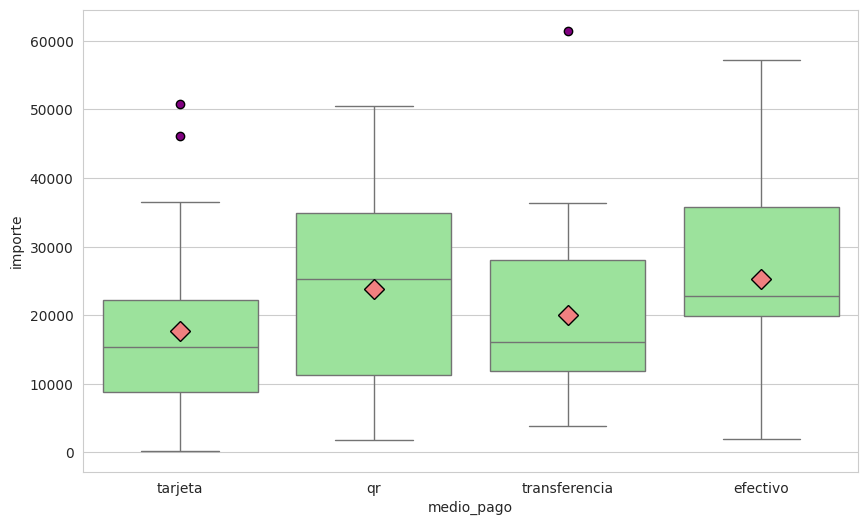

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.boxplot(x="medio_pago", y="importe", data=ventas_por_ticket,
            color="lightgreen",
            showfliers=True,
            flierprops={"marker":"o","markerfacecolor":"purple","markeredgecolor":"black"},
            showmeans=True,
            meanprops={"marker":"D","markerfacecolor":"lightcoral",
                       "markeredgecolor":"black","markersize":10})


In [ ]:
import pandas as pd

# --- 1️⃣ CARGA DEL DATASET ---
df = pd.read_csv("/content/drive/MyDrive/demoibm/data_final/productos_categorias_normalizadas.csv")

# --- 2️⃣ IMPORTE TOTAL POR VENTA ---
ventas_por_ticket = df.groupby("id_venta", as_index=False).agg({
    "importe": "sum",
    "medio_pago": "first"  # se asume un único medio de pago por venta
})

# --- 3️⃣ ESTADÍSTICAS DESCRIPTIVAS POR MEDIO DE PAGO ---
stats = ventas_por_ticket.groupby("medio_pago")["importe"].describe()

# --- 4️⃣ CÁLCULO DE IQR (RANGO INTERCUARTÍLICO) ---
q1 = ventas_por_ticket.groupby("medio_pago")["importe"].quantile(0.25)
q3 = ventas_por_ticket.groupby("medio_pago")["importe"].quantile(0.75)
iqr = q3 - q1

# --- 5️⃣ AGREGAR IQR AL DATAFRAME DE ESTADÍSTICAS ---
stats["IQR"] = iqr

# --- 6️⃣ MOSTRAR RESULTADOS ---
print("📊 Estadísticas descriptivas del importe por medio de pago:\n")
print(stats)


📊 Estadísticas descriptivas del importe por medio de pago:

               count          mean           std     min       25%      50%  \
medio_pago                                                                    
efectivo        37.0  25265.378378  13174.363551  2012.0  19825.00  22851.0   
qr              30.0  23809.333333  13646.525136  1876.0  11265.00  25318.5   
tarjeta         26.0  17696.115385  13108.422408   272.0   8793.25  15411.5   
transferencia   27.0  20082.185185  12759.540063  3827.0  11881.00  16053.0   

                    75%      max      IQR  
medio_pago                                 
efectivo       35856.00  57287.0  16031.0  
qr             34976.50  50461.0  23711.5  
tarjeta        22294.75  50855.0  13501.5  
transferencia  28046.00  61503.0  16165.0  




* El medio de pago que muestra mayor rango intercuartil es QR, siendo el mas heterogeneo.

* El más homogeneo es tarjeta.

* Los tickets mas altos en promedio corresponden a efectivo y los más bajos a tarjeta.



# Distribución de VENTAS por CIUDAD


/tmp/ipython-input-3832662182.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_ciudad.index, y=ventas_por_ciudad.values, palette='magma')


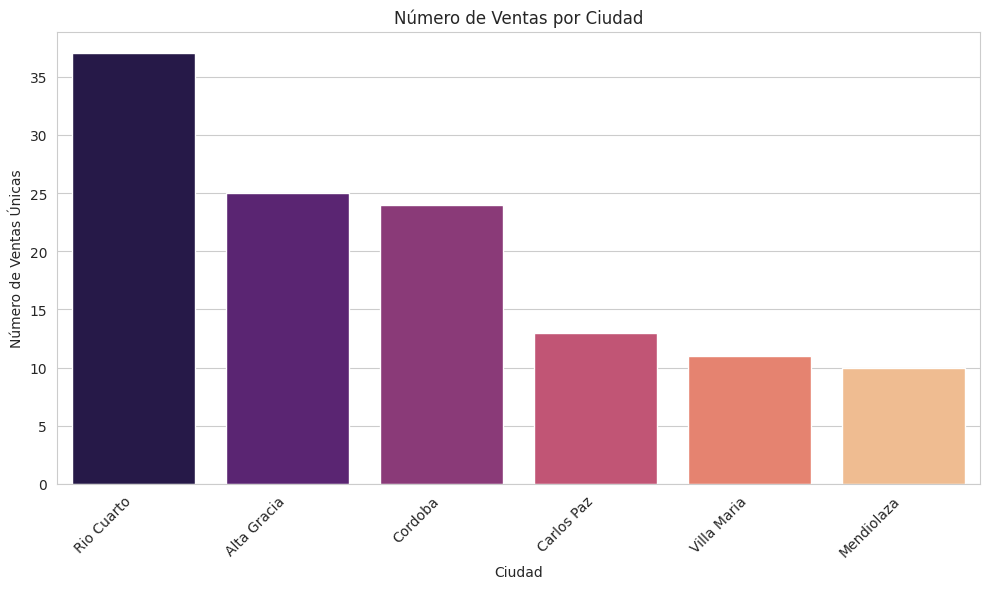

In [ ]:
# Ventas por ciudad
ventas_por_ciudad = df.groupby('ciudad')['id_venta'].nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=ventas_por_ciudad.index, y=ventas_por_ciudad.values, palette='magma')
plt.title('Número de Ventas por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Número de Ventas Únicas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Basado en el gráfico de barras que muestra el "Número de Ventas por Ciudad", podemos observar cómo se distribuyen las ventas únicas en las diferentes ciudades:

**Río Cuarto:** Es la ciudad con la mayor cantidad de ventas únicas.

**Alta Gracia y Córdoba:** Le siguen en cantidad de ventas, siendo ciudades también importantes para el negocio.

**Carlos Paz, Villa María y Mendiolaza:** Tienen un número menor de ventas únicas en comparación con las otras ciudades.

Este análisis da una idea de dónde se concentran las ventas y cuáles son las ciudades con mayor actividad.

In [ ]:
print("=" * 60)
print("ANÁLISIS ESTADÍSTICO: VENTAS POR CIUDAD")
print("=" * 60)

# Calcular métricas
total_ventas_ciudad = ventas_por_ciudad.sum()
promedio_ciudad = ventas_por_ciudad.mean()
desviacion_ciudad = ventas_por_ciudad.std()
coeficiente_variacion_ciudad = (desviacion_ciudad / promedio_ciudad) * 100

print(f"\nTotal de ventas únicas: {total_ventas_ciudad}")
print(f"Promedio por ciudad: {promedio_ciudad:.2f} ventas")
print(f"Desviación Estándar: {desviacion_ciudad:.2f}")
print(f"Coeficiente de Variación: {coeficiente_variacion_ciudad:.2f}%")

# Comentario sobre el tipo de distribución (basado en el gráfico anterior)
print("\nObservación sobre la distribución:")
print("Basado en el gráfico de barras, la distribución de ventas por ciudad muestra variabilidad, con un pico claro en Río Cuarto y diferencias notables entre las otras ciudades.")

ANÁLISIS ESTADÍSTICO: VENTAS POR CIUDAD

Total de ventas únicas: 120
Promedio por ciudad: 20.00 ventas
Desviación Estándar: 10.58
Coeficiente de Variación: 52.92%

Observación sobre la distribución:
Basado en el gráfico de barras, la distribución de ventas por ciudad muestra variabilidad, con un pico claro en Río Cuarto y diferencias notables entre las otras ciudades.


In [ ]:
import folium
import pandas as pd

# Cargar el dataset maestro si no está ya cargado
# Asegúrate de que la ruta sea correcta
try:
    ventas_completas
except NameError:
    df = pd.read_csv("/content/drive/MyDrive/demoibm/data_final/ventas_completas.csv")


# Paso 1: Calcular ventas únicas por ciudad
ventas_por_ciudad = df.groupby('ciudad')['id_venta'].nunique().reset_index()
ventas_por_ciudad.rename(columns={'id_venta': 'numero_ventas'}, inplace=True)

# Paso 2: Asignar coordenadas geográficas simuladas a cada ciudad
# NOTA: Estas son coordenadas simuladas. Para un análisis real, deberías usar
# una fuente de datos geográfica (ej. Geopy, Nominatim, un archivo shapefile, etc.)
# Aquí asumimos algunas ubicaciones representativas para las ciudades de ejemplo.
coordenadas_ciudades = {
    'Rio Cuarto': [-33.1227, -64.3248],
    'Alta Gracia': [-31.6521, -64.4273],
    'Cordoba': [-31.4201, -64.1888],
    'Carlos Paz': [-31.4234, -64.5043],
    'Villa Maria': [-32.4073, -63.2433],
    'Mendiolaza': [-31.2667, -64.3167],
    'Desconocido': [-34.6037, -58.3816] # Coordenada genérica para desconocidos
}

ventas_por_ciudad['latitud'] = ventas_por_ciudad['ciudad'].map(lambda x: coordenadas_ciudades.get(x, [0, 0])[0])
ventas_por_ciudad['longitud'] = ventas_por_ciudad['ciudad'].map(lambda x: coordenadas_ciudades.get(x, [0, 0])[1])


# Eliminar ciudades sin coordenadas simuladas si las hay (aunque con .get(x, [0,0]) no debería haber)
ventas_por_ciudad = ventas_por_ciudad[(ventas_por_ciudad['latitud'] != 0) | (ventas_por_ciudad['longitud'] != 0)].copy()


# Paso 3: Crear el mapa base
# El centro del mapa puede ser una ciudad central o el promedio de las coordenadas
centro_mapa = [-31.4201, -64.1888] # Centro aproximado de la provincia de Córdoba
mapa_ventas = folium.Map(location=centro_mapa, zoom_start=9)

# Paso 4: Añadir marcadores o círculos al mapa
for index, row in ventas_por_ciudad.iterrows():
    ciudad = row['ciudad']
    ventas = row['numero_ventas']
    lat = row['latitud']
    lon = row['longitud']

    # Usar círculos con radio proporcional al número de ventas
    folium.CircleMarker(
        location=[lat, lon],
        radius=ventas * 0.5,  # Ajusta este factor para el tamaño del círculo
        popup=f"Ciudad: {ciudad}<br>Ventas: {ventas}",
        color='blue',
        fill=True,
        fill_color='steelblue',
        fill_opacity=0.6
    ).add_to(mapa_ventas)

# Paso 5: Mostrar el mapa
display(mapa_ventas)

Categoría más vendida por mes:
    mes  categoria  id_venta
1     1   Limpieza        20
2     2  Alimentos        19
5     3   Limpieza        18
6     4  Alimentos        11
8     5  Alimentos        19
11    6   Limpieza        19


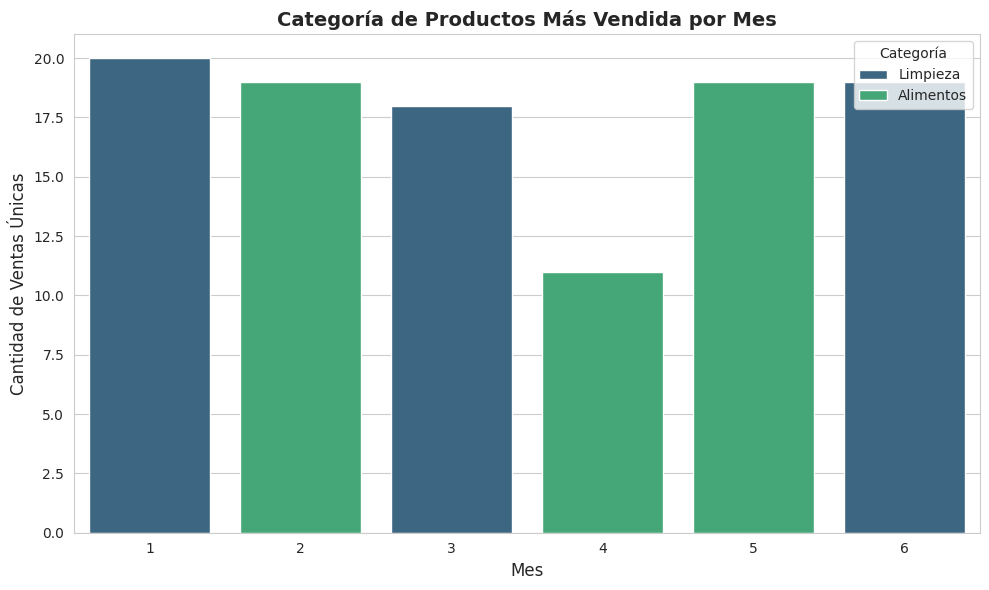


✅ Análisis de categorías más vendidas por mes completado.


In [ ]:
# =============================================================
# ANÁLISIS DE CATEGORÍAS MÁS VENDIDAS POR MES
# =============================================================

# Agrupar por mes y categoría, y contar las ventas (id_venta)
ventas_por_mes_categoria = df.groupby(['mes', 'categoria'])['id_venta'].nunique().reset_index()

# Encontrar la categoría más vendida por mes
idx = ventas_por_mes_categoria.groupby('mes')['id_venta'].idxmax()
categoria_mas_vendida_por_mes = ventas_por_mes_categoria.loc[idx]

print("Categoría más vendida por mes:")
print(categoria_mas_vendida_por_mes)

# Crear figura para el gráfico
plt.figure(figsize=(10, 6))

# Gráfico de barras de la categoría más vendida por mes
sns.barplot(x='mes', y='id_venta', hue='categoria', data=categoria_mas_vendida_por_mes, palette='viridis')

plt.title('Categoría de Productos Más Vendida por Mes', fontsize=14, fontweight='bold')
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de Ventas Únicas', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Categoría')
plt.tight_layout()
plt.show()

print("\n✅ Análisis de categorías más vendidas por mes completado.")

**Interpretación del Mapa Geográfico:**

El mapa muestra la distribución espacial de las ventas únicas por ciudad. Cada círculo representa una ciudad, y el tamaño del círculo es proporcional al número de ventas en esa ciudad.

*   **Círculos más grandes:** Indican ciudades con un mayor volumen de ventas.
*   **Círculos más pequeños:** Indican ciudades con un menor volumen de ventas.

Al pasar el cursor o hacer clic (dependiendo de la interactividad del mapa), se puede ver el nombre de la ciudad y el número exacto de ventas.

Este tipo de visualización es útil para identificar rápidamente las áreas geográficas clave para el negocio y planificar estrategias basadas en la ubicación.

**Del análisis de las categorías más vendidas por mes, que se muestra en el gráfico de barras y en la tabla, podemos obtener las siguientes ideas:**

Categorías dominantes: Identificamos qué categorías de productos son las más populares en cada mes específico. En este caso, vemos que **"Limpieza" y "Alimentos"** alternan como la categoría más vendida a lo largo de los meses.

Tendencias estacionales: Podemos observar si hay patrones o tendencias en las ventas de ciertas categorías a lo largo del año. Por ejemplo, si una categoría es consistentemente la más vendida en ciertos meses, podría indicar una demanda estacional. En este caso, parece haber una alternancia, lo que podría sugerir diferentes factores influyendo en las ventas.

Planificación de inventario y marketing: Conocer qué categorías son las más vendidas en cada mes puede ayudar a la tienda a planificar su inventario y enfocar sus esfuerzos de marketing en las categorías relevantes para cada período.

Comparación de rendimiento: Permite comparar el rendimiento de las categorías mes a mes y ver si hay variaciones significativas en la demanda.

En resumen, este análisis nos da una visión temporal de qué productos son los que más contribuyen a las ventas en diferentes momentos del año.

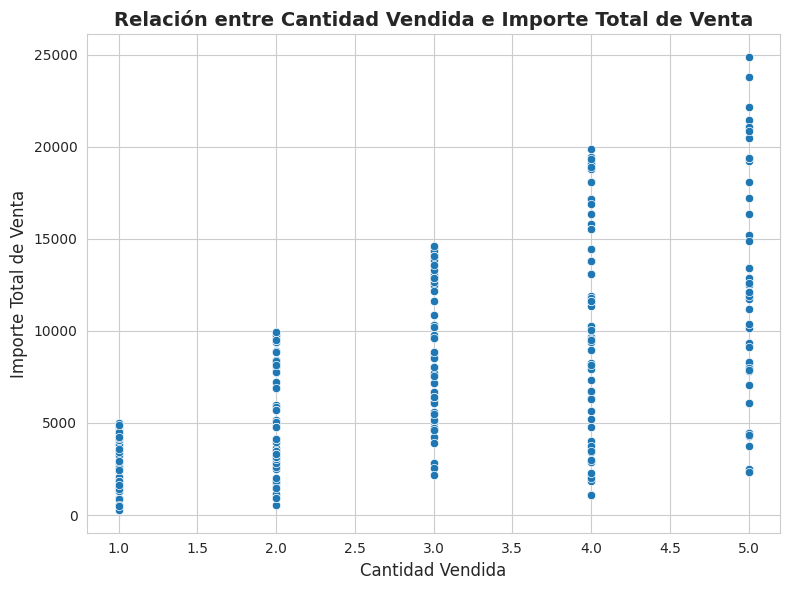


✅ Análisis de relación entre cantidad e importe completado.


In [ ]:
# =============================================================
# ANÁLISIS DE RELACIÓN ENTRE CANTIDAD E IMPORTE
# =============================================================

plt.figure(figsize=(8, 6))
sns.scatterplot(x='cantidad', y='importe', data=df)
plt.title('Relación entre Cantidad Vendida e Importe Total de Venta', fontsize=14, fontweight='bold')
plt.xlabel('Cantidad Vendida', fontsize=12)
plt.ylabel('Importe Total de Venta', fontsize=12)
plt.tight_layout()
plt.show()

print("\n✅ Análisis de relación entre cantidad e importe completado.")